# 1. Cournot Model 

In this project, we will solve the Cournot model with 2 competitor firms (i and j). We consider a homogeneous product market with 2 firms in which each firm sets q as output. Cournot duopoly, also called Cournot competition, is a model of imperfect competition.

The idea behind the Cournot Model is that each firm chooses the best reply function, taking into account the quantities that its competitor takes to the market.

The inverse demand function is given by:
    # P(qi,qj) = d - a*qi - b*qj, where P is the price of the market, d is a parameter and a and b are elasticities.
    
    Total Output of the industry = q1 + qj
     
The cost function is given by:
    # cost(qi) = ci* qi, where ci is the cost of production of 1 unit of firm i's output.

Firm i ’s cost function: C (qi), with C'i (qi) > 0 and C"i (qi) ≥ 0.
     
The goal of each firm is to maximize their profits, considering the other firm as well:

Profit = P* qi - cost(qi) = (d - a* qi - b* qj)* qi - ci* qi

In [1]:
# Importing useful packages
import numpy as np
import scipy as sp
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pylab

In [2]:
# Sympy package helps writting  

sm.init_printing(use_unicode=True)

In [3]:
from sympy import *

# 2. Model

We start our analysis of the Cournot model with the simple case of an oligopoly facing a linear demand for a homogeneous product and producing at constant marginal costs.

Nash equilibrium happens when no firm can increase its profits by unilaterally choosing some other quantity, given the equilibrium quantity of its rivals :
    # πi (q1*,q2*) ≥ πi (q1, q2)

Industry´s output is the the sum of the quantities produce by the two firms:

    # Q = q1 + q2

In [4]:
# Defining the elements in the firms choice

d = sm.symbols('d')
a,b = sm.symbols('a b')
q1, q2 = sm.symbols('q1 q2') 
c1, c2 = sm.symbols('c1 c2') 

In [5]:
# Defining equations: inverse demand function P(qi,qj) and the cost function

# Inverse Demand Function:
def p(q1,q2):
    return d - a* q1 - b* q2

# Cost Function:
def cost(q,c):
    return c* q

Marginal Cost is the first derivative of the cost function.

Firms maximize profits with the first order condition and the set to 0:

    Firm i: d - 2aqi - bqj -ci = 0
    Firm j: d - aqi - 2bqj -cj = 0

After solving the first order conditions we get to the best response functions:

    Firm i: qi= 1/2a * (d-ci-bj)
    Firm j: qj= 1/2b * (d-cj-ai)

In equilibrium: qi = Ri(qj) is best response for firm i taking into account qj

In [6]:
# Defining the profit function of a firm with cost level c that produces output q1 while taking into account the competitor 
# quantities q2 because firms are competing with each other

def profit(q1,q2,c):
    return p(q1,q2)*q1 - cost(q1,c)

foc1 = diff(profit(q1,q2,c1),q1)
foc2 = diff(profit(q2,q1,c2),q2)

In [7]:
foc1

In [8]:
foc2

In [9]:
# For firm 1, optimal price:

sol1= sm.solve(sm.Eq(foc1,0),q1)[0]
sol1

In [10]:
# For firm 2, optimal price:

sol2= sm.solve(sm.Eq(foc2,0),q2)[0]
sol2

So, now that we have the optimal prices of each firm, we must take into account the other firm choice. That is, by choosing some quantity, the other will take that choice into account and it´s now aware of that.

In [11]:
# Best response of q1, substituting the q2 in equation 1

sol1_subs = foc1.subs(q2,sol2)
sol1_subs

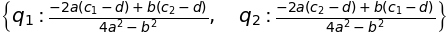

In [12]:
# This will give a general expression of the solution:

solve([foc1, foc2], [q1, q2])

The expression above is the general reaction function for both firms. This firms allow the other firm to set the best quantity, taking into account their competitor´s behaviour. 

Next, we will define the reaction function. The function reaction does exactly that. Below we use the function brute to look for the global maximum of π.

In [13]:
def reaction(q2,c1,b):
    q1 = optimize.brute(lambda x: -profit(q1,q2,c1,b), ((0,1,),)) # brute minimizes the function;
                                                                 # when we minimize -profits, we maximize profits
    return x1[0]

What can infuence the total output?
           # The elasticities parameters, which are a and b and the costs.

# 3. Example 1: Firms with symmetric costs

In the case of constant marginal costs, this means to assume that c1 = c2. Then, using the expression above (the general expression of the solution), we derive the quantity produced.

Example with the firm costs being the same:

In [14]:
d=100
a=1
b=1
c1=1
c2=1

# P(qi,qj)=100-qi-qj
# cost(qi)=1*qi and cost(qj)=1*qj
# Profit firm i = P*qi-ci(qi) = (100-2qi-2qj)*qi-qi

Substituting the parameters in the demand function and in the cost function, we will have the firms' profits and outputs.

In [15]:
def profit(q1,q2,c):
    return p(q1,q2)*q1 - cost(q1,c)

foc1 = diff(profit(q1,q2,c1),q1)
foc2 = diff(profit(q2,q1,c2),q2)

solve([foc1, foc2], [q1, q2])

What all this explains is a very basic principle. Both companies are vying for maximum benefits. These benefits are derived from both maximum sales volume (a larger share of the market) and higher prices (higher profitability). The problem stems from the fact that increasing profitability through higher prices can damage revenue by losing market share. What Cournot’s approach does is maximise both market share and profitability by defining optimum prices. This price will be the same for both companies, as otherwise the one with the lower price will obtain full market share, which makes this a Nash equilibrium, also known for this model the Cournot-Nash equilibrium.

This is intuitive: when both firms have equal costs, the answer will be symmetric and both will produce the same quantities. It can also be the case that they have different cost functions and the one with lower costs will have an advantage and will produce more.

To be the lower cost firm, what can be gained by higher efficiency, means to produce and sell more, as we will see bellow.

# 4. Example 2: Firms with asymmetric costs

Case when firms have asymmetric costs (q1 != q2):

In [16]:
# If we want to give specific values to the variables

d=100
a=1
b=0.5
c1=1
c2=4

# Note that if the cost of firm 1 is lower, this firm has an advantage and it will bring more quantities to the market
# The result will be q1 > q2

def profit(q1,q2,c):
    return p(q1,q2)*q1 - cost(q1,c)

foc1 = diff(profit(q1,q2,c1),q1)
foc2 = diff(profit(q2,q1,c2),q2)

solve([foc1, foc2], [q1, q2])

Conclusion: firm 1 will produce more than firm 2. This is logical: if c2 is higher than c1, firm 1 will produce and therefore sell more, having higher profits than the second firm.

Knowing the optimal values of q1 and q2, we can find the optimal price for this market:

    P(q1,q2) = 100 - q1 - q2*0.5
    P(q1,q2) = 100 - 40 - 19
    P(q1,q2) = 41
    
We can now substitute the price in the demand functions and find the general expressions for q1 and q2:

    q1 = 59 - q2*0.5
    q2 = 118 - q1*2

With this example, we can make a graph that shows the different reaction functions and the optimal point. This optimal point is given where the lines cross each other and shows the best choices of production.

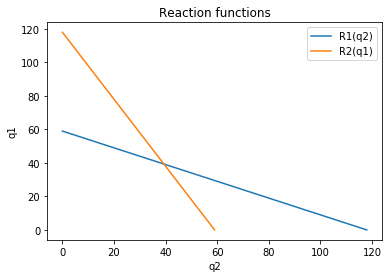

In [17]:
# Plot

plt.plot([0,38,118],[59,40,0], label = 'R1(q2)')
plt.plot([0,40,59],[118,38,0], label = 'R2(q1)')
plt.legend()
plt.xlabel('q2')
plt.ylabel('q1')
plt.title('Reaction functions')
plt.savefig('Cournot1.png')

# 5. Numerical Simulation with asymmetric costs:

In [18]:
# Importing useful packages

from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

Now that we have the useful packages installed we need to define the functions that are useful to us.

In [22]:
# Defining inverse demand function
def p(q1,q2):
    return d-a*q1-b*q2

# Defining costs function
def costs(q,c):
    return c*q

# Defining profits function
def profits(demand_function,cost_function,c,q1,q2):
    return demand_function(q1,q2)*q1-costs(q1,c) 

Giving values to the parameters where costs are asymmetric across firms.

In [24]:
# Giving values to the parameters
d = 100
a = 10
b = 2
c1=10
c2=2

# Defining the reaction function
def reaction(q2,c1):
    q1 = optimize.fminbound(lambda x: -profits(p,costs,c1,x,q2),0,d,full_output=1)
    return q1[0]

def fixed_point(q,c):
    return [q[0]-reaction(q[1],c[0]),q[1]-reaction(q[0],c[1])] #[0] stands for firm 1 and [1] for firm 2
initial_guess = [0,0]

# General formula to get the optimal quantities
optimize.fsolve(lambda q: fixed_point(q,[c1,c2]), initial_guess)

array([4.05050505, 4.49494949])

We can plot the output level of firms 1 and 2 as a function of c1.

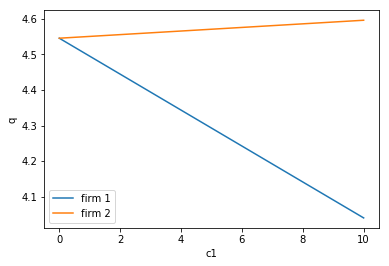

In [25]:
# Plot

range_c = arange(0,11,1)
range_q = [optimize.fsolve(lambda q: fixed_point(q,[c,0]), [0,0]) for c in range_c]
plt.plot(range_c,array(range_q)[:,0], label = 'firm 1')
plt.plot(range_c,array(range_q)[:,1], label = 'firm 2')
plt.legend()
plt.xlabel('c1')
plt.ylabel('q')
plt.savefig('Cournot2.png')

Conclusion: higher costs for firm 1 will lead to a lower output, and the opposite will occur with firm 2. This simulation result would be the same as if we had done it in order to q2. So firm 1 and firm2 have to take into account their costs because they will affect the quantities sold and therefore profits.

This is the general result from Cournot. In this work we didn´t take into account the possibility of the existence of capacity constraints for both firms because this would affect the final result.